In [1]:
import matplotlib.pyplot as plt
from maze import Maze, plot_action_values, plot_policy
import numpy as np

In [2]:
env = Maze()

In [3]:
action_values = np.zeros((5,5,4))

In [4]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [5]:
def exploratory_policy(state):
    return np.random.randint(4)

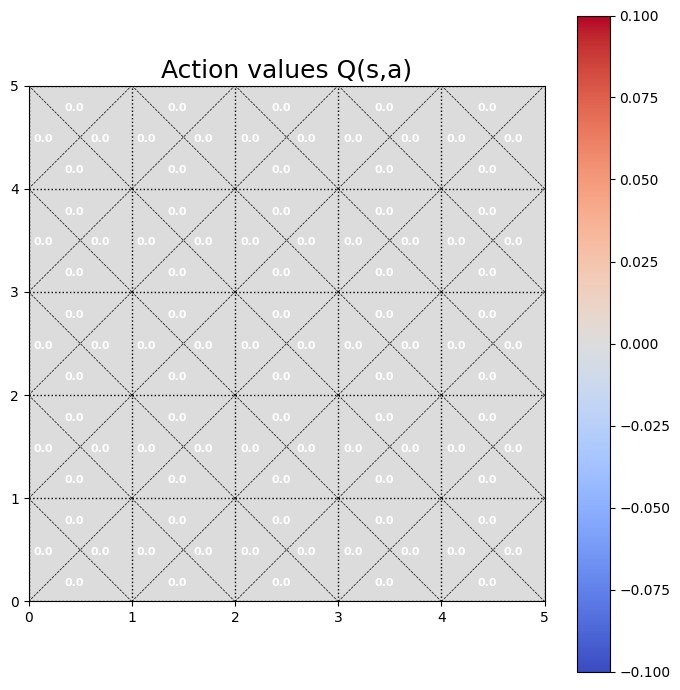

In [6]:
plot_action_values(action_values)

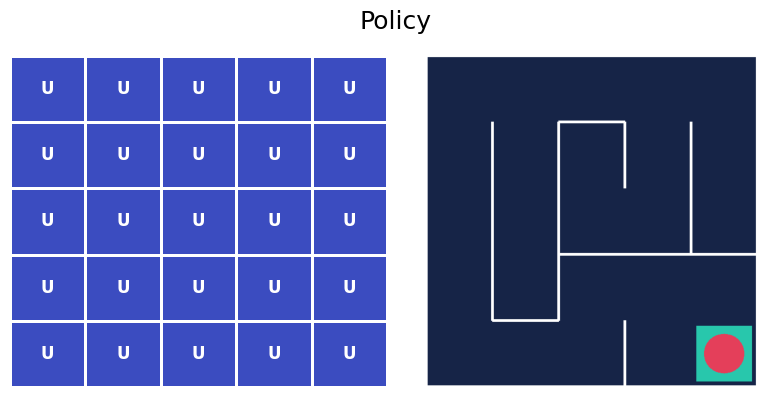

In [7]:
plot_policy(action_values, env.render(mode = 'rgb_array'))

In [8]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha = 0.1, gamma = 0.99):
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False

        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            next_action = target_policy(next_state)
            
            qsa = action_values[state][action]
            qsa_next = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * qsa_next - qsa)
            state = next_state


In [35]:
q_learning(action_values, exploratory_policy, target_policy, 1000)

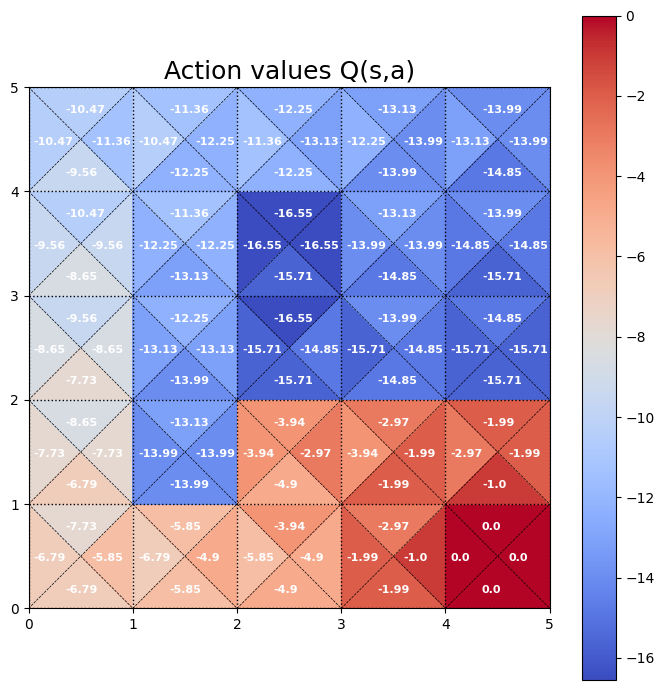

In [36]:
plot_action_values(action_values)

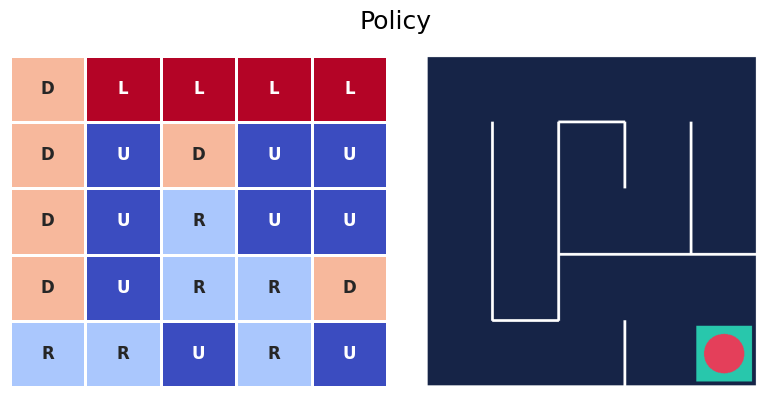

In [37]:
plot_policy(action_values, env.render(mode = 'rgb_array'))

In [38]:
test_agent(env, target_policy)

C:\Users\hebli\AppData\Local\Temp\ipykernel_23524\547560918.py:215: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use(orig_backend)
